In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import acquire
import prepare

# Part I

Do these exercises in `explore.ipynb` notebook. As always, add, commit, and push your changes.

**Section 1 - iris_db**: Using iris data from our MySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data.

In [8]:
df_iris = acquire.get_iris_data()

File does not exist - creating CSV file


In [9]:
df_iris = prepare.prep_iris(df_iris)

In [10]:
train, validate, test = prepare.split_data(df_iris, 'species')

In [11]:
train.shape, validate.shape, test.shape

((90, 5), (30, 5), (30, 5))

In [12]:
train

,sepal_length,sepal_width,petal_length,petal_width,species
108,6.7,2.5,5.8,1.8,virginica
69,5.6,2.5,3.9,1.1,versicolor
101,5.8,2.7,5.1,1.9,virginica
15,5.7,4.4,1.5,0.4,setosa
50,7.0,3.2,4.7,1.4,versicolor
...,...,...,...,...,...
70,5.9,3.2,4.8,1.8,versicolor
33,5.5,4.2,1.4,0.2,setosa
95,5.7,3.0,4.2,1.2,versicolor
139,6.9,3.1,5.4,2.1,virginica


### 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [13]:
quantitative_columns = train.columns[train.nunique() > 10]
quantitative_columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

sepal_length


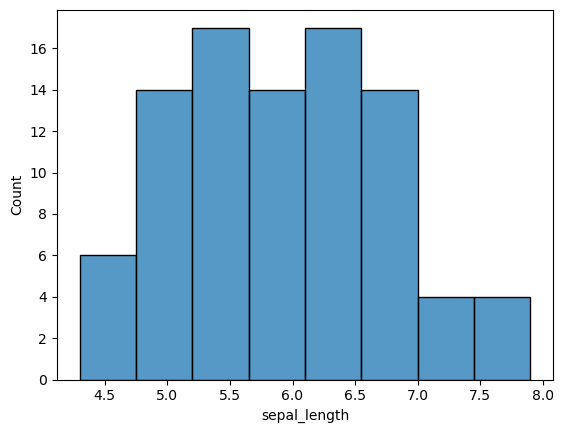

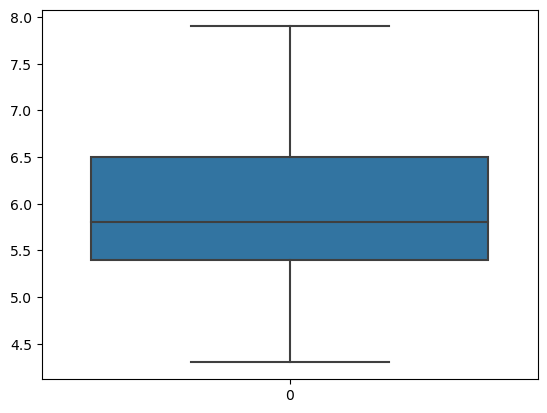

count    90.000000
mean      5.918889
std       0.810589
min       4.300000
25%       5.400000
50%       5.800000
75%       6.500000
max       7.900000
Name: sepal_length, dtype: float64

sepal_width


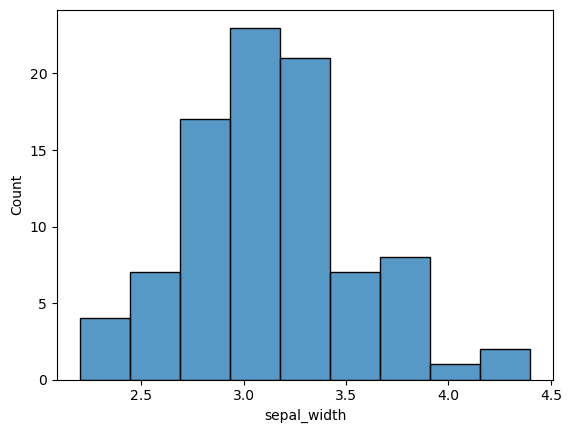

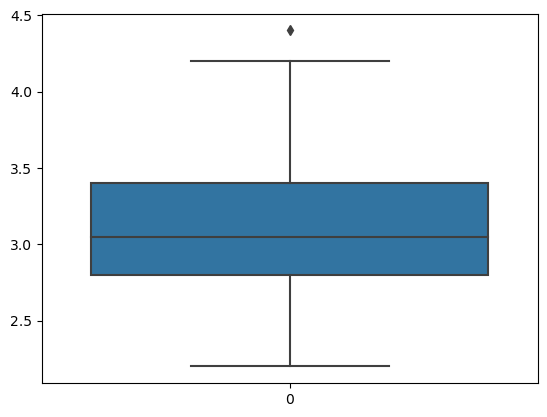

count    90.000000
mean      3.122222
std       0.433895
min       2.200000
25%       2.800000
50%       3.050000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64

petal_length


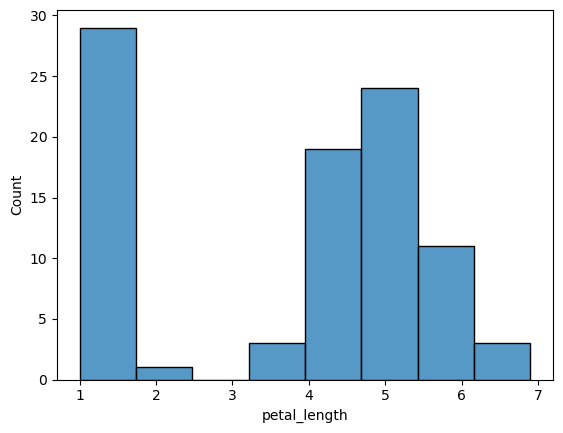

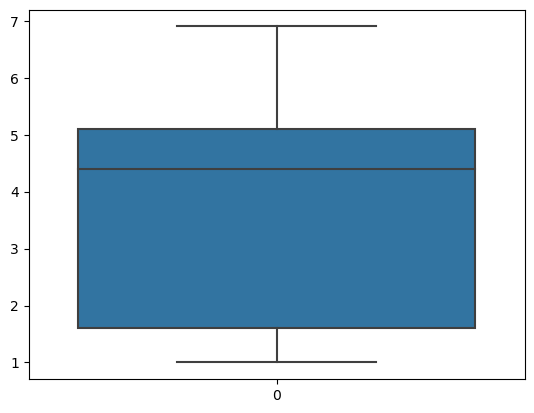

count    90.000000
mean      3.782222
std       1.760910
min       1.000000
25%       1.600000
50%       4.400000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

petal_width


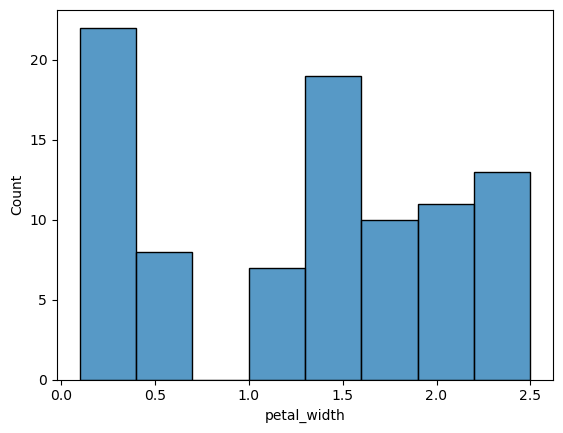

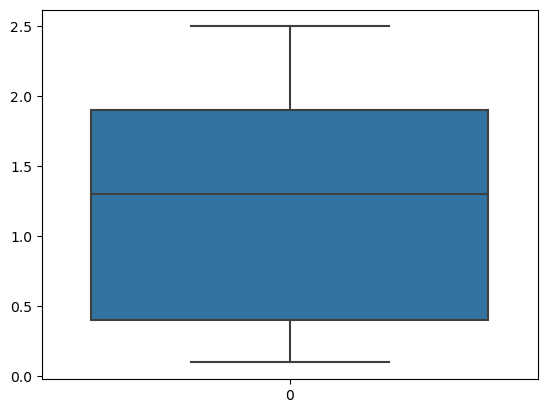

count    90.000000
mean      1.241111
std       0.783667
min       0.100000
25%       0.400000
50%       1.300000
75%       1.900000
max       2.500000
Name: petal_width, dtype: float64



In [14]:
for quant_column in quantitative_columns:
    print(quant_column)
    sns.histplot(data=train[quant_column])
    plt.show()
    sns.boxplot(data=train[quant_column])
    
    plt.show()
    print(f'{train[quant_column].describe()}\n')

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [15]:
categorical_columns = train.columns[train.nunique() < 10]
categorical_columns

Index(['species'], dtype='object')

species

species
virginica     30
versicolor    30
setosa        30
Name: count, dtype: int64

species
virginica     0.333333
versicolor    0.333333
setosa        0.333333
Name: proportion, dtype: float64



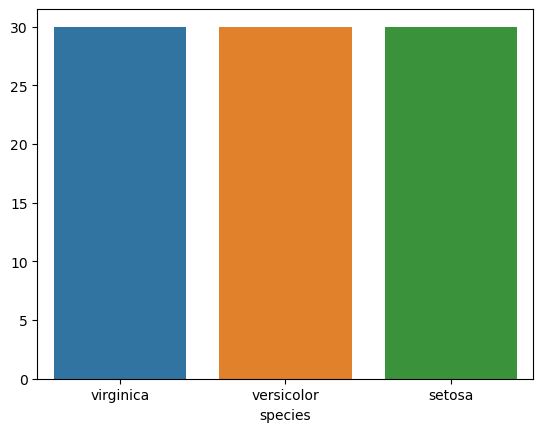

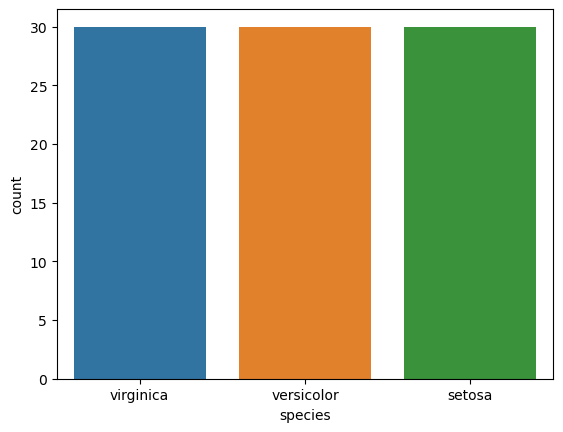

In [18]:
for cat_column in categorical_columns:
    print(f'{cat_column}\n')
    print(f'{train[cat_column].value_counts()}\n')
    print(f'{train[cat_column].value_counts(normalize=True)}\n')
    sns.barplot(x=train[cat_column].value_counts().index, y=train[cat_column].value_counts().values)
    plt.show()
    sns.countplot(x=train[cat_column])

- Document takeaways & any actions.

### 3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

In [19]:
quantitative_columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [20]:
categorical_columns

Index(['species'], dtype='object')

sepal_length


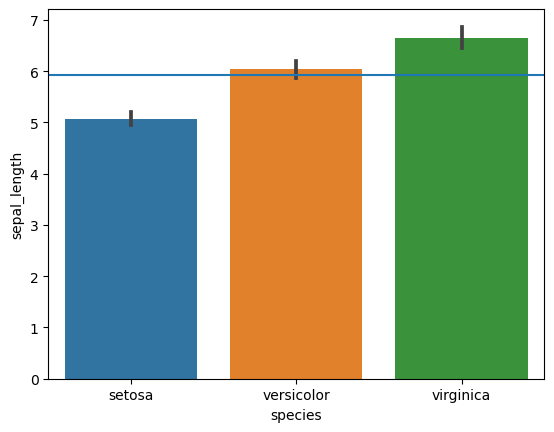

sepal_width


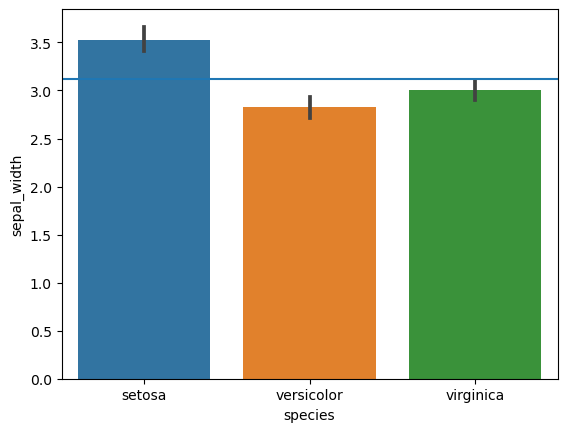

petal_length


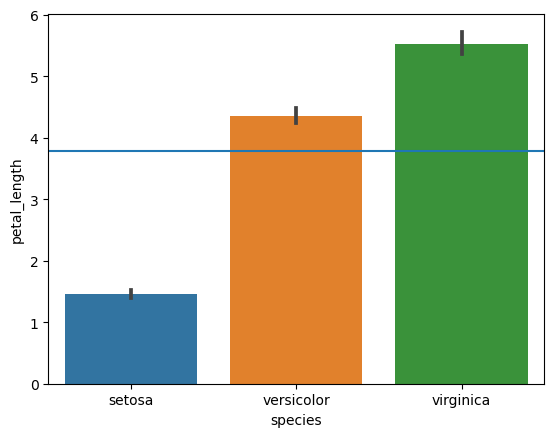

petal_width


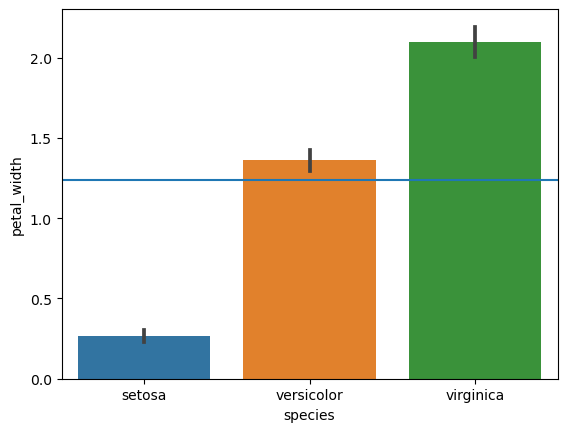

In [21]:
for quant_column in quantitative_columns:
    print(quant_column)
    for cat_column in categorical_columns:
        sns.barplot(data=train,x=train[cat_column].sort_index(),y=train[quant_column])
        plt.axhline(y=train[quant_column].mean())
        plt.show()

- For each measurement type, compute the descriptive statistics for each species.

In [22]:
for cat_column in categorical_columns:
    for each_species in train[cat_column].unique():
        print(each_species)
        print(f'{train[train.species == each_species].describe()}\n')

virginica
       sepal_length  sepal_width  petal_length  petal_width
count     30.000000    30.000000     30.000000    30.000000
mean       6.650000     3.006667      5.526667     2.100000
std        0.588247     0.298194      0.523208     0.267814
min        5.600000     2.500000      4.900000     1.500000
25%        6.300000     2.800000      5.100000     1.900000
50%        6.600000     3.000000      5.400000     2.100000
75%        6.900000     3.175000      5.800000     2.300000
max        7.900000     3.800000      6.900000     2.500000

versicolor
       sepal_length  sepal_width  petal_length  petal_width
count     30.000000    30.000000     30.000000    30.000000
mean       6.036667     2.830000      4.360000     1.360000
std        0.467925     0.309783      0.370089     0.188643
min        5.500000     2.200000      3.600000     1.000000
25%        5.600000     2.625000      4.100000     1.300000
50%        5.950000     2.850000      4.400000     1.300000
75%        6.37500

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [23]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']
setosa = train[train.species == 'setosa']

α = .05

In [24]:
t,p = stats.mannwhitneyu(virginica.petal_width,versicolor.petal_width)

In [25]:
if p < α:
    print('Reject the null hypothesis! There IS a relationship!')
else:
    print('Failed to reject the null hypothesis! There is NO relationship!')

Reject the null hypothesis! There IS a relationship!


In [26]:
t,p = stats.mannwhitneyu(virginica.sepal_length,versicolor.sepal_length)

In [27]:
if p < α:
    print('Reject the null hypothesis! There IS a relationship!')
else:
    print('Failed to reject the null hypothesis! There is NO relationship!')

Reject the null hypothesis! There IS a relationship!


In [28]:
t,p = stats.mannwhitneyu(virginica.sepal_width,versicolor.sepal_width)

In [29]:
if p < α:
    print('Reject the null hypothesis! There IS a relationship!')
else:
    print('Failed to reject the null hypothesis! There is NO relationship!')

Failed to reject the null hypothesis! There is NO relationship!


In [30]:
t,p = stats.mannwhitneyu(virginica.petal_length,versicolor.petal_length)

In [31]:
if p < α:
    print('Reject the null hypothesis! There IS a relationship!')
else:
    print('Failed to reject the null hypothesis! There is NO relationship!')

Reject the null hypothesis! There IS a relationship!


- Document takeaways & any actions.

### 4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


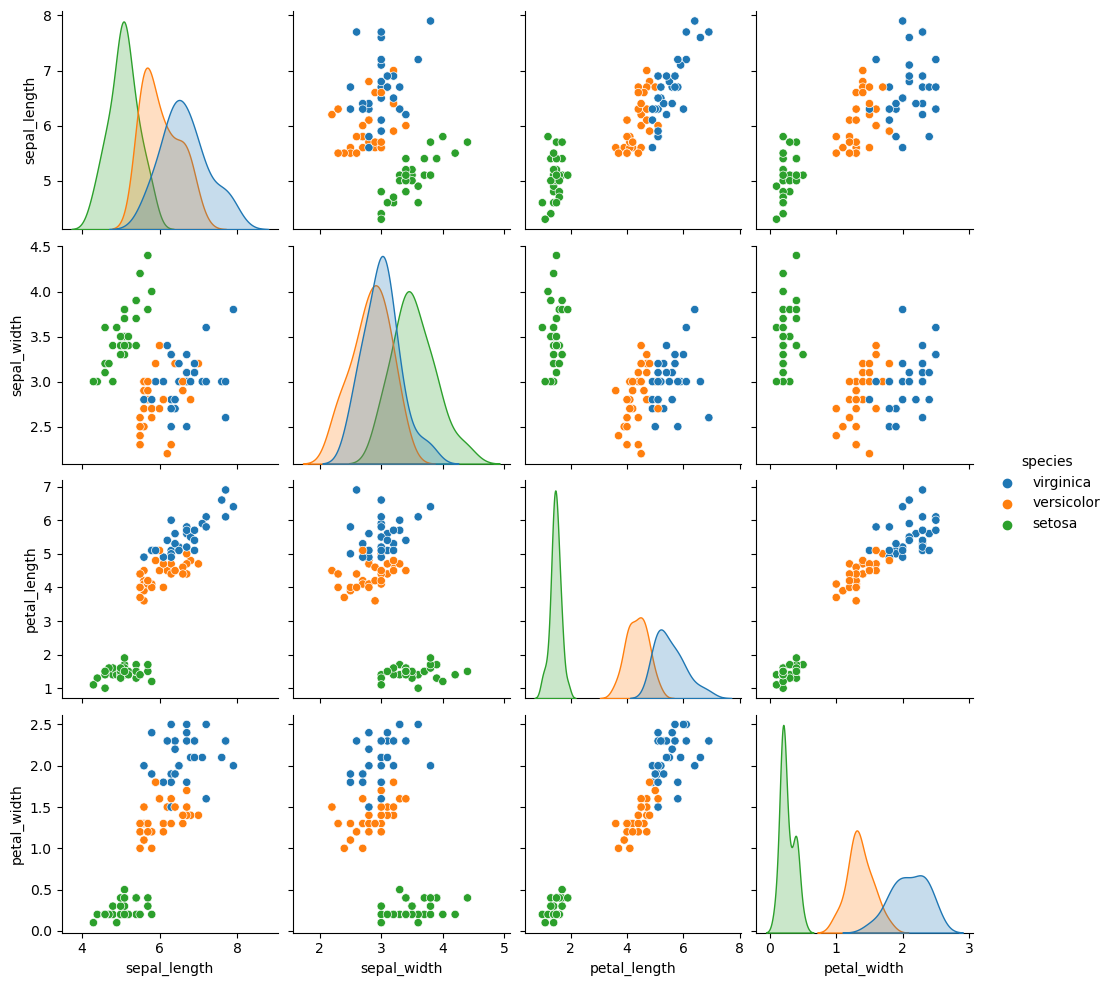

In [32]:
sns.pairplot(data=train,hue='species')

- Visualize two numeric variables of the species. Hint: `sns.relplot` with `hue` or `col`

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


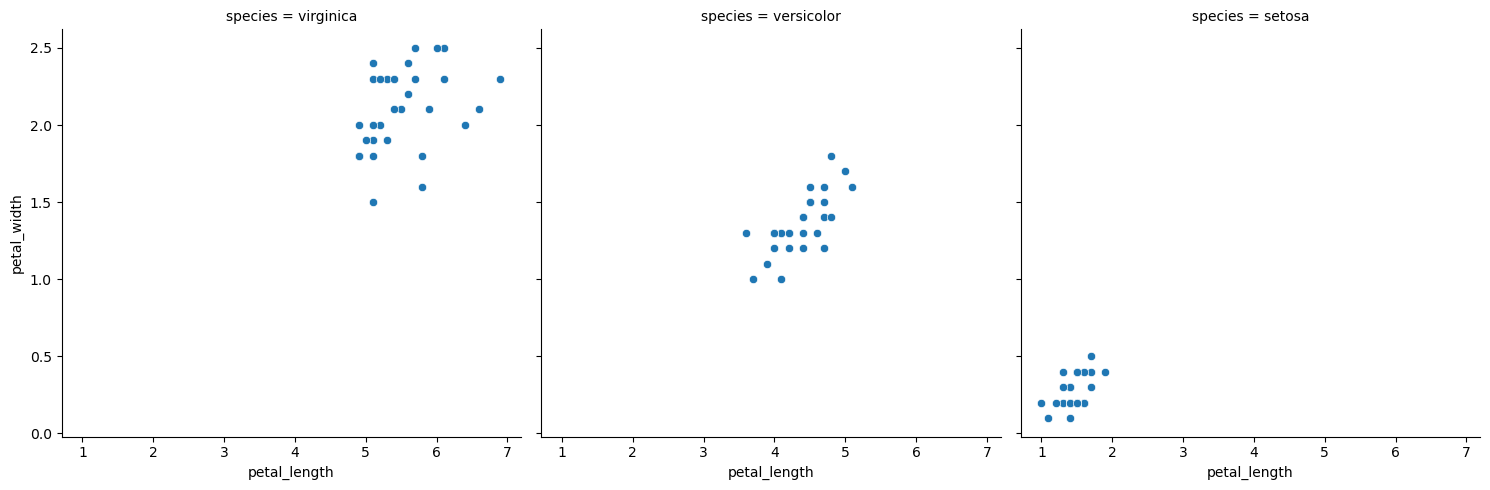

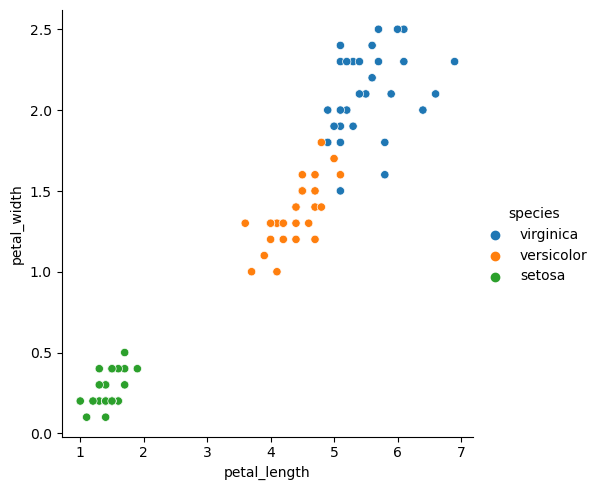

In [33]:
sns.relplot(data=train,x='petal_length',y='petal_width',col='species')
sns.relplot(data=train,x='petal_length',y='petal_width',hue='species')
plt.show()

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

> **Question**: Is the petal area significantly different in versicolor compared to virginica?

> $H_0$: There is no significant difference in the petal area between versicolor compared to virginica.

> $H_a$: There is a significant difference in the petal area between versicolor compared to virginica.

In [34]:
train['petal_area'] = train.petal_length * train.petal_width

In [35]:
versicolor_virginica = train[train.species != 'setosa']
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

<Axes: xlabel='species', ylabel='petal_area'>

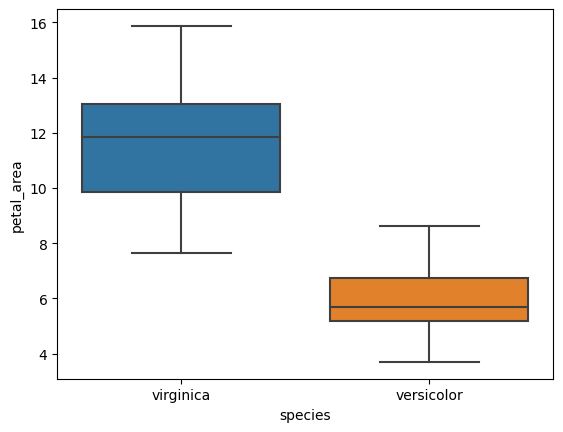

In [36]:
sns.boxplot(versicolor_virginica,x=versicolor_virginica.species,y=versicolor_virginica.petal_area)

In [37]:
t,p = stats.mannwhitneyu(virginica.petal_area,versicolor.petal_area)
t,p

(897.0, 4.0469958077256535e-11)

In [38]:
if p < α:
    print('Reject the null hypothesis!')
else:
    print('Failed to reject the null hypothesis!')

Reject the null hypothesis!


- Document takeaways and any actions.

# Part III

- Explore your `telco` data to discover drivers of churn

In [2]:
df_telco = acquire.get_telco_data()

File does not exist - creating CSV file


In [3]:
df_telco = prepare.prep_telco(df_telco)

In [4]:
train, validate, test = prepare.split_data(df_telco,'churn')

In [5]:
train.shape, validate.shape, test.shape

((4225, 21), (1409, 21), (1409, 21))

In [6]:
train.nunique()

customer_id              4225
gender                      2
senior_citizen              2
partner                     2
dependents                  2
tenure                     73
phone_service               2
multiple_lines              3
online_security             3
online_backup               3
device_protection           3
tech_support                3
streaming_tv                3
streaming_movies            3
paperless_billing           2
monthly_charges          1367
total_charges            3994
churn                       2
contract_type               3
internet_service_type       3
payment_type                4
dtype: int64

In [7]:
train = train.set_index(train.customer_id)
train = train.drop(columns=['customer_id'])

In [9]:
categorical_columns = train.columns[train.nunique() < 10]
categorical_columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [10]:
quantitative_columns = train.columns[train.nunique() > 10]
quantitative_columns

Index(['tenure', 'monthly_charges', 'total_charges'], dtype='object')

In [39]:
cat_cols_w_rel = []
cat_cols_wo_rel = []

for column in categorical_columns:
    observed = pd.crosstab(train[column],train.churn)
    α = .05
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    
    if p < α:
        cat_cols_w_rel.append(column)
    else:
        cat_cols_wo_rel.append(column)
    
print(cat_cols_w_rel)
print()
print(cat_cols_wo_rel)

['senior_citizen', 'partner', 'dependents', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']

['gender', 'phone_service']


two-sample / 2-tailed 

In [43]:
churned = train[train.churn == 'Yes']
active = train[train.churn == 'No']
quant_cols_w_rel = []
quant_cols_wo_rel = []

for column in quantitative_columns:
    t,p = stats.mannwhitneyu(churned[column], active[column])
    α = .05
    
    if p < α:
        quant_cols_w_rel.append(column)
    else:
        quant_cols_wo_rel.append(column)
    
print(quant_cols_w_rel)
print()
print(quant_cols_wo_rel)

['tenure', 'monthly_charges', 'total_charges']

[]


- Determine if certain columns should be dropped

- Determine if it would be valuable to bin some numeric columns

- Determine if it would be valuable to combine multiple columns into one.